In [8]:
from bs4 import BeautifulSoup
from bs4 import NavigableString
import re
from itertools import groupby

In [9]:
import requests

In [10]:
def get_HTML(url):
    headers =  {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36' }    
    resp_data = requests.get(url, headers=headers).text
    return resp_data

In [11]:
def scrape_soup_cryptic_crossword_data(current_node):
    opened = []
    reached_across = False
    data = [] 
    while(current_node):
        if hasattr(current_node,'contents') and current_node.contents:
            opened += reversed(current_node.contents)
        else:
            if type(current_node) is NavigableString :
                data.append(current_node)
        if len(opened) > 0:
            current_node = opened.pop()
        else:
            break
    return [x[0] for x in groupby(data)]

In [12]:
def scrape_html_for_cryptic_crossword_data(html):
    try:
        soup = BeautifulSoup(html, "html.parser")
        body = soup.find('body')
        return scrape_soup_cryptic_crossword_data(body.parent)
    except Exception:
        return []

In [14]:
#!/usr/bin/python

import os

dataset = []
i = 0
# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk("/Users/life/Desktop/ft/"):
    path = root.split(os.sep)
    for file in files:
        if len(re.findall('.html$',file))>0:
            file_path = '/'.join(path)+'/'+file
            i%1000 == 0 and print(i)
            i+=1
            try:
                with open(file_path,encoding="utf8") as html:
                    dataset += scrape_html_for_cryptic_crossword_data(html)
            except Exception as e:
                print(e)
                continue

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [15]:
# import pickle
# with open("fifteen_wget_dataset.txt", "w") as f:
#     for s in dataset:
#         f.write(str(s) +"\n")

In [16]:
del dataset

In [17]:
dataset=[]
with open("fifteen_wget_dataset.txt", "r") as f:
    for line in f:
        dataset.append(line)

In [18]:
len(dataset)

28602088

In [19]:
corpus = re.sub('[\n\t]',' ',"".join(dataset))

In [20]:
corpus = re.sub('\xa0','',corpus)

In [21]:
corpus[:100]

'  Independent 8294/Dac – Fifteensquared       window._wpemojiSettings = {"baseUrl":"https:\\/\\/s.w.or'

In [22]:
clues = re.findall('\d{1,2}[\.\s]*[A-Z]+[&…“”\s\w\-–—,’‘?;:!\/\\]+[\s]+\(\d{1,2}[,\-]*\d*\)',corpus)

In [23]:
len(clues)

236952

In [24]:
clues[:10]

['1   Th E TH underer   2   PENGUIN — sorry, please can someone explain this — is a penguin some sort of argot like a monkey or a pony for a certain sum of money? [ Chocolate biscuit: pound and fourteen shillings, in the old days? ]   3   DOUBLE FIGURES — 2 defs — I suppose it’s clear enough without painstakingly saying ‘and less than a hundred’, which would make it far too easy   4   EN TRY(1)',
 '14A   Big story abound the end of Troy,  possibly a playwrights great one  (6)',
 '18A    A poet’s never the more   anonymous in new refurbished home (7)',
 '23A   Priest restricted by holy man  showing wisdom  (7)',
 '25A   Wine  house so far back (6)',
 '28A   Losing interest interns felt awfully  bitter  (9)',
 '32A    Colour   I put into periodical with US city academician (8)',
 '2D   Earl seen in Scottish river  crying  (5)',
 '12D    Sensitive tissue  to slow up acceleration (6)',
 '15D   Carol’s hybrid flourished on top  like a small flower  (9)']

In [25]:
inputs = [(clues[i],clues[i+1]) for i in range(len(clues)-1)]

In [26]:
inputs[0]

('1   Th E TH underer   2   PENGUIN — sorry, please can someone explain this — is a penguin some sort of argot like a monkey or a pony for a certain sum of money? [ Chocolate biscuit: pound and fourteen shillings, in the old days? ]   3   DOUBLE FIGURES — 2 defs — I suppose it’s clear enough without painstakingly saying ‘and less than a hundred’, which would make it far too easy   4   EN TRY(1)',
 '14A   Big story abound the end of Troy,  possibly a playwrights great one  (6)')

In [27]:
def get_explanation(curr_clue,next_clue):
    regex = re.escape(curr_clue) + '(.+?)' + re.escape(next_clue)
    try:
        return re.search(regex,corpus).group(1)
    except Exception:
        return "ERROR"


In [28]:
from itertools import starmap
from multiprocessing import Pool

In [29]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    chunks_list = []
    for i in range(0, len(l), n):
        chunks_list.append(l[i:i + n])
    return chunks_list

In [34]:
input_chunks = chunks(inputs,len(inputs)//100)

In [36]:
!rm fifteen_wget_explanations.txt

rm: fifteen_wget_explanations.txt: No such file or directory


In [37]:
[print(len(chunk)) for chunk in input_chunks]

2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
2369
51


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [38]:
for chunk in input_chunks:
    starmap_explanations = []
    for (i,inp) in enumerate(chunk):
        if(i%1000)==0:
            print(i)
        explanation = get_explanation(inp[0],inp[1])
        if(len(explanation) > 1000):
            explanation = 'INVALID'
        starmap_explanations.append(explanation)
    with open("fifteen_wget_explanations.txt", "a") as f:
        for s in starmap_explanations:
            if(len(s)<1000):
                f.write(str(s) +"\n")
            else:
                f.write("INVALID" +"\n")
    del starmap_explanations

0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
1000
2000
0
10

In [39]:
starmap_explanations=[]
with open("fifteen_wget_explanations.txt", "r") as f:
    for line in f:
        starmap_explanations.append(line)

In [40]:
starmap_explanations[12]

'   CATALO   O(ver) after CAT (man) + A(bout)    L   \n'

In [41]:
clues[12]

'22D    Cross   over following man about (6)'

In [42]:
import pandas

In [43]:
clues_cpy = clues[:-1]

In [44]:
len(clues_cpy)

236951

In [45]:
len(starmap_explanations)

236951

In [53]:
df = pandas.DataFrame({'clue':clues_cpy,'exp':starmap_explanations})

In [54]:
df['len'] = df['exp'].apply(lambda x:len(x))

In [55]:
from matplotlib import pyplot

90.11152938793252


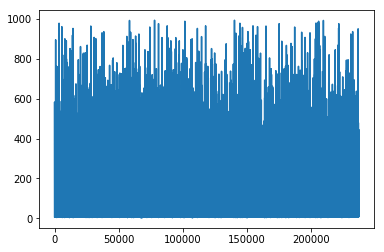

In [56]:
print(df['len'].mean())
pyplot.plot(df['len'])

In [57]:
df = df[df['len']<150]

In [58]:
df = df.reset_index(drop=True)

In [61]:
df = df[~df['exp'].str.contains('INVALID')]

In [62]:
len(df)

190206

In [64]:
# df.to_csv("../fifteen_dataset/fifteen_all_200k.csv",index=False)